In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-eda1/insurance.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("../input/insurance-eda1/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#EDA

In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum().sort_values(ascending=False)

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

In [8]:
#Missing Value check

In [9]:
def missing_check(df):
    Total=df.isnull().sum().sort_values(ascending=False)
    Percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percentage'])
    return missing_data

In [10]:
missing_check(df)

,Total,Percentage
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


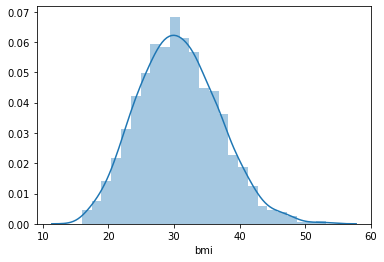

In [12]:
sns.distplot(df['bmi'])

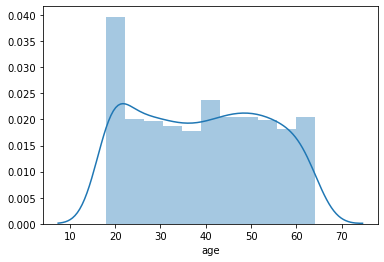

In [13]:
sns.distplot(df['age'])

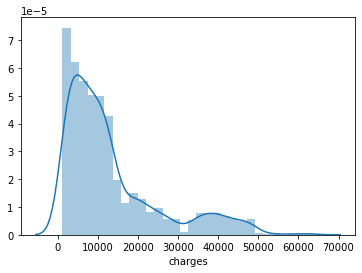

In [14]:
sns.distplot(df['charges'])

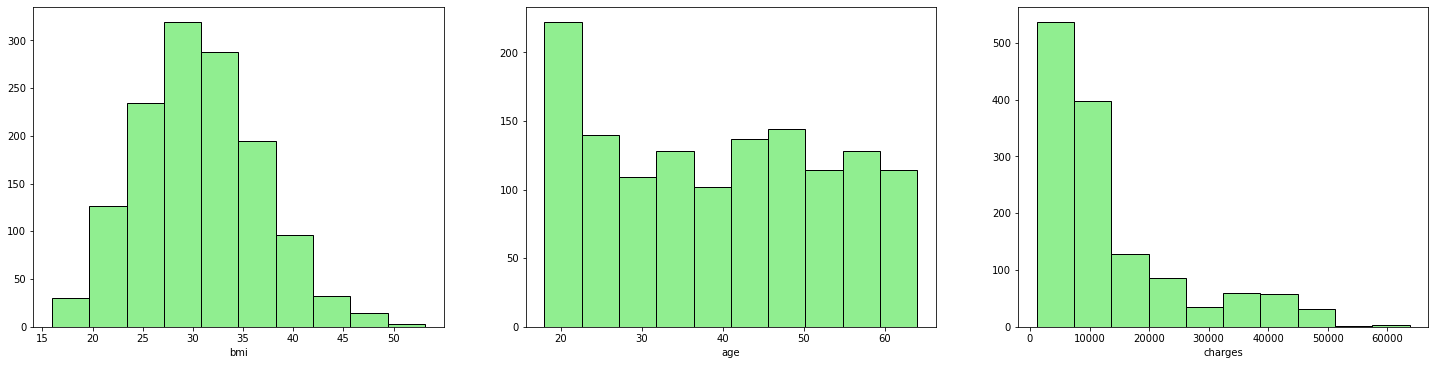

In [15]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.hist(df['bmi'],color='lightgreen',edgecolor='black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df['age'],color='lightgreen',edgecolor='black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df['charges'],color='lightgreen',edgecolor='black')
plt.xlabel('charges')

plt.show()

In [16]:
#skewness

In [17]:
a=df['bmi'].skew()
print('Skewness of BMI is:',a)

Skewness of BMI is: 0.2840471105987448


In [18]:
b=df['age'].skew()
print('Skewness of AGE is:',b)

Skewness of AGE is: 0.05567251565299186


In [19]:
c=df['charges'].skew()
print('Skewness of Charges is:',c)

Skewness of Charges is: 1.5158796580240388


In [20]:
skew=pd.DataFrame({'Skewness': [df['bmi'].skew(),df['age'].skew(),df['charges'].skew()]},
                 index=['bmi','age','charges'])
skew

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


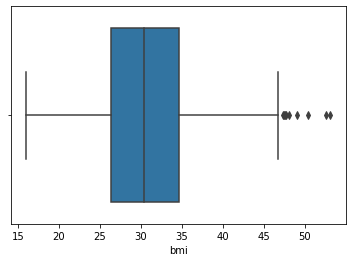

In [21]:
sns.boxplot(x=df['bmi'])

In [22]:
#checking count of outliers.
q25,q75=np.percentile(df['bmi'],25),np.percentile(df['bmi'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['bmi'] if i < lower or i > upper]
print('Total Number of outliers in BMI: ',len(Outliers))

Total Number of outliers in BMI:  9


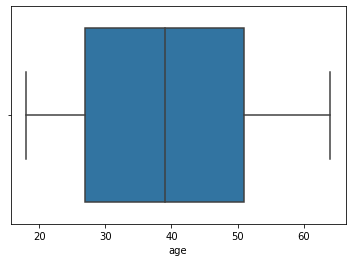

In [23]:
sns.boxplot(x=df['age'])

In [24]:
#checking count of outliers.
q25,q75=np.percentile(df['age'],25),np.percentile(df['age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['age'] if i < lower or i > upper]
print('Total Number of outliers in AGE: ',len(Outliers))

Total Number of outliers in AGE:  0


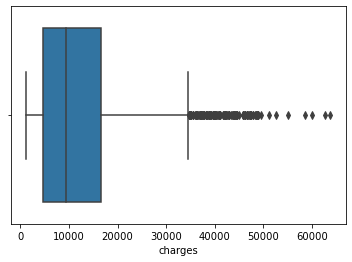

In [25]:
sns.boxplot(x=df['charges'])

In [26]:
#checking count of outliers.
q25,q75=np.percentile(df['charges'],25),np.percentile(df['charges'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['charges'] if i < lower or i > upper]
print('Total Number of outliers in charges: ',len(Outliers))

Total Number of outliers in charges:  139


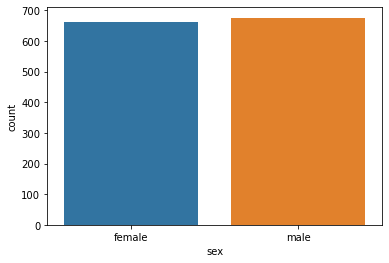

In [27]:
sns.countplot(x='sex',data=df)

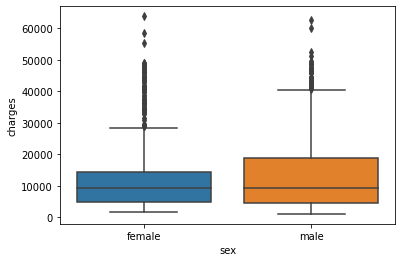

In [28]:
sns.boxplot(x='sex',y='charges',data=df)

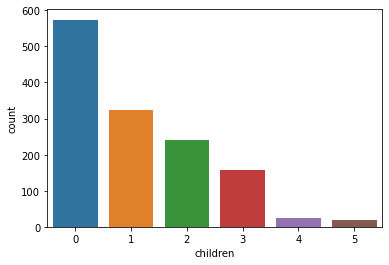

In [29]:
sns.countplot(x='children',data=df)

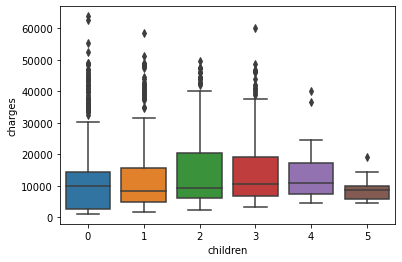

In [30]:
sns.boxplot(x='children', y='charges', data= df)

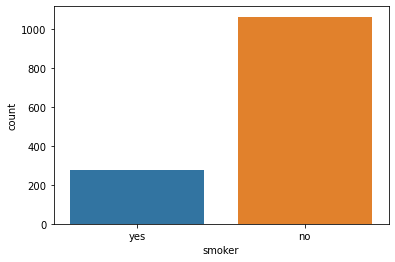

In [31]:
sns.countplot(x='smoker',data=df)

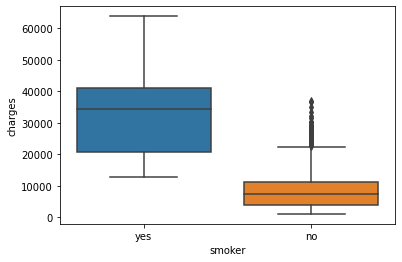

In [32]:
sns.boxplot(x='smoker', y='charges', data= df)

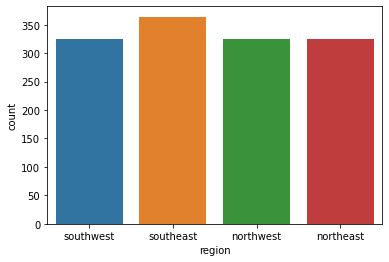

In [33]:
sns.countplot(x='region',data=df)

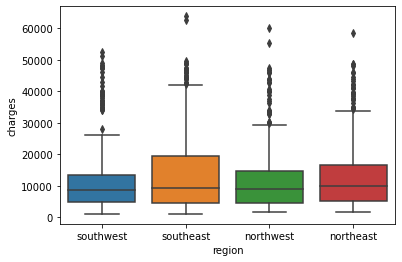

In [34]:
sns.boxplot(x='region', y='charges', data= df)

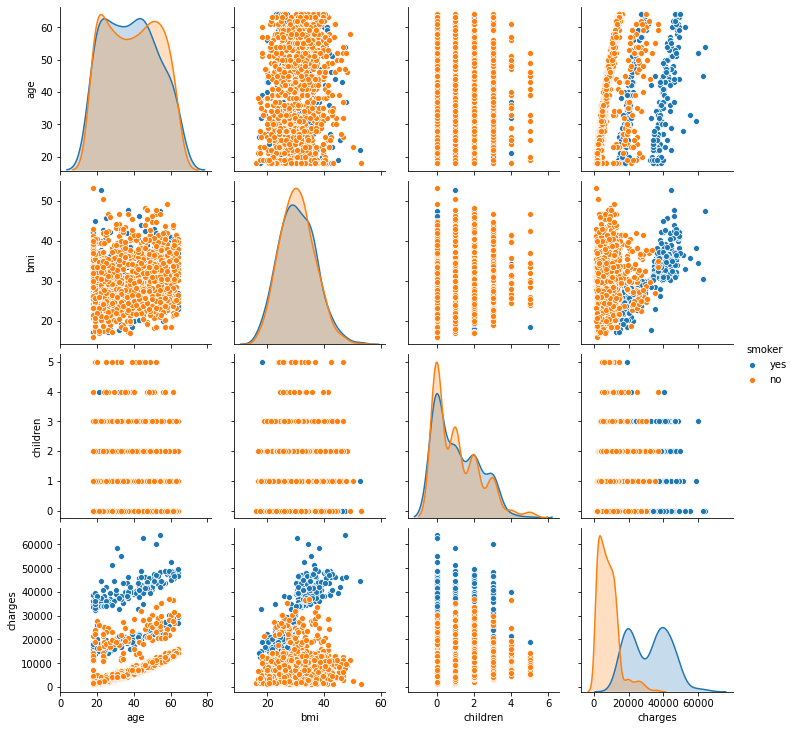

In [40]:
sns.pairplot(df,hue='smoker')
plt.show()

In [36]:
df1=df.copy()

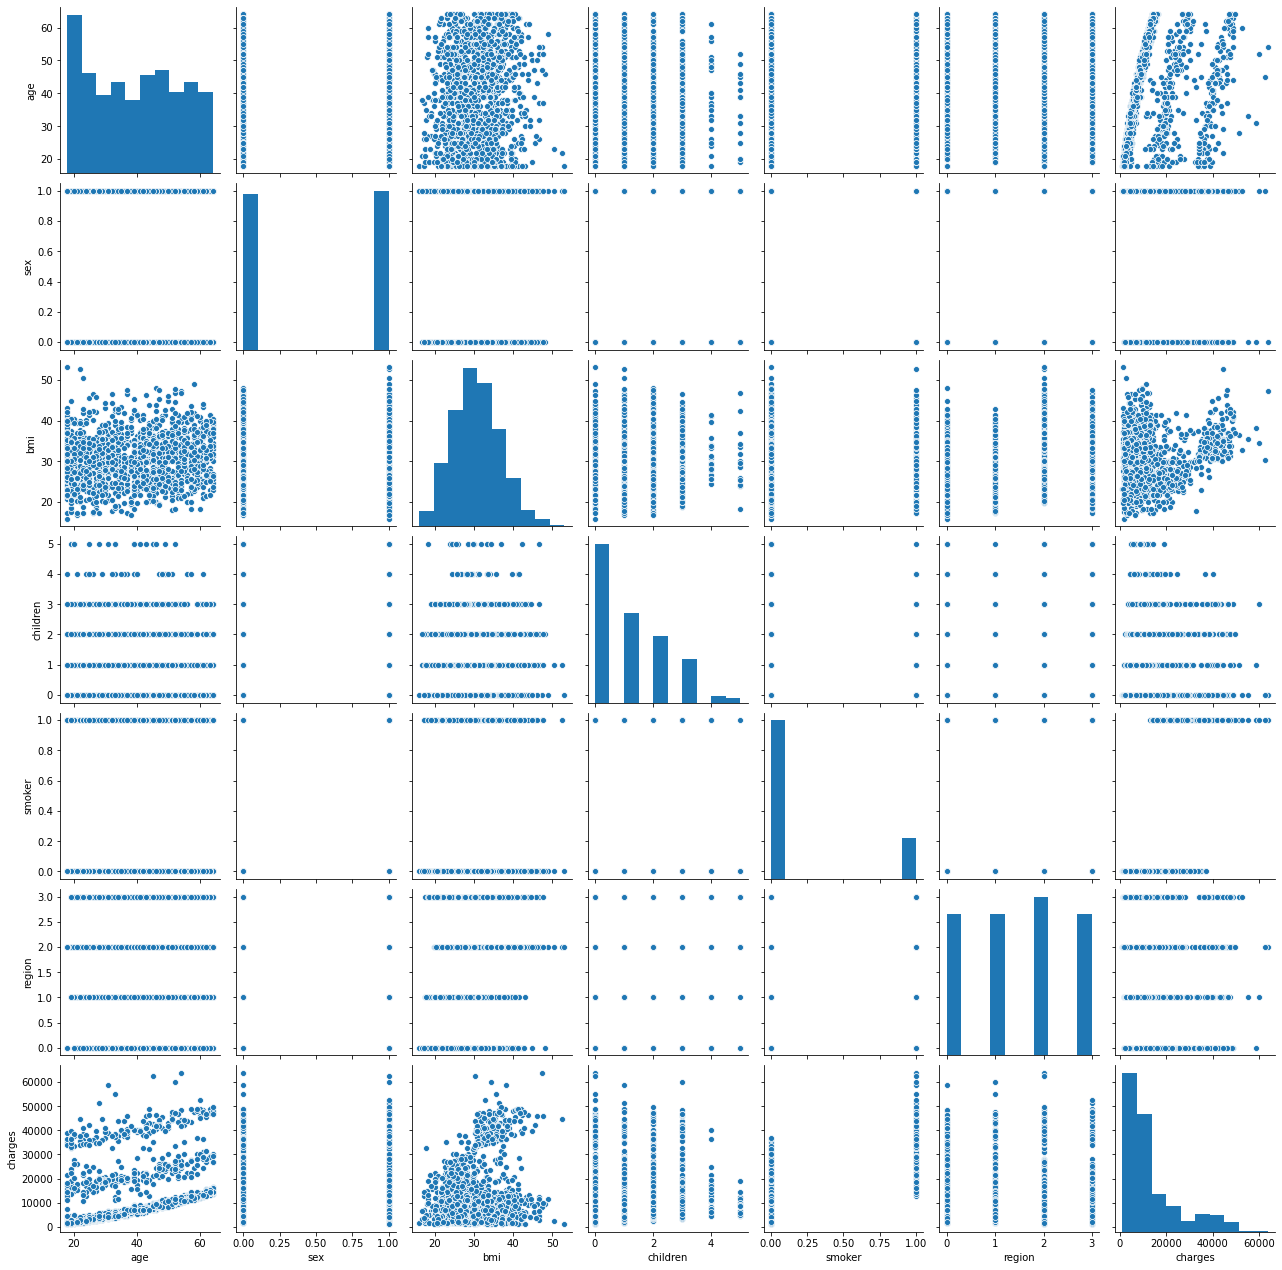

In [37]:
df1.loc[:,['sex','smoker','region']]=df1.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df1)

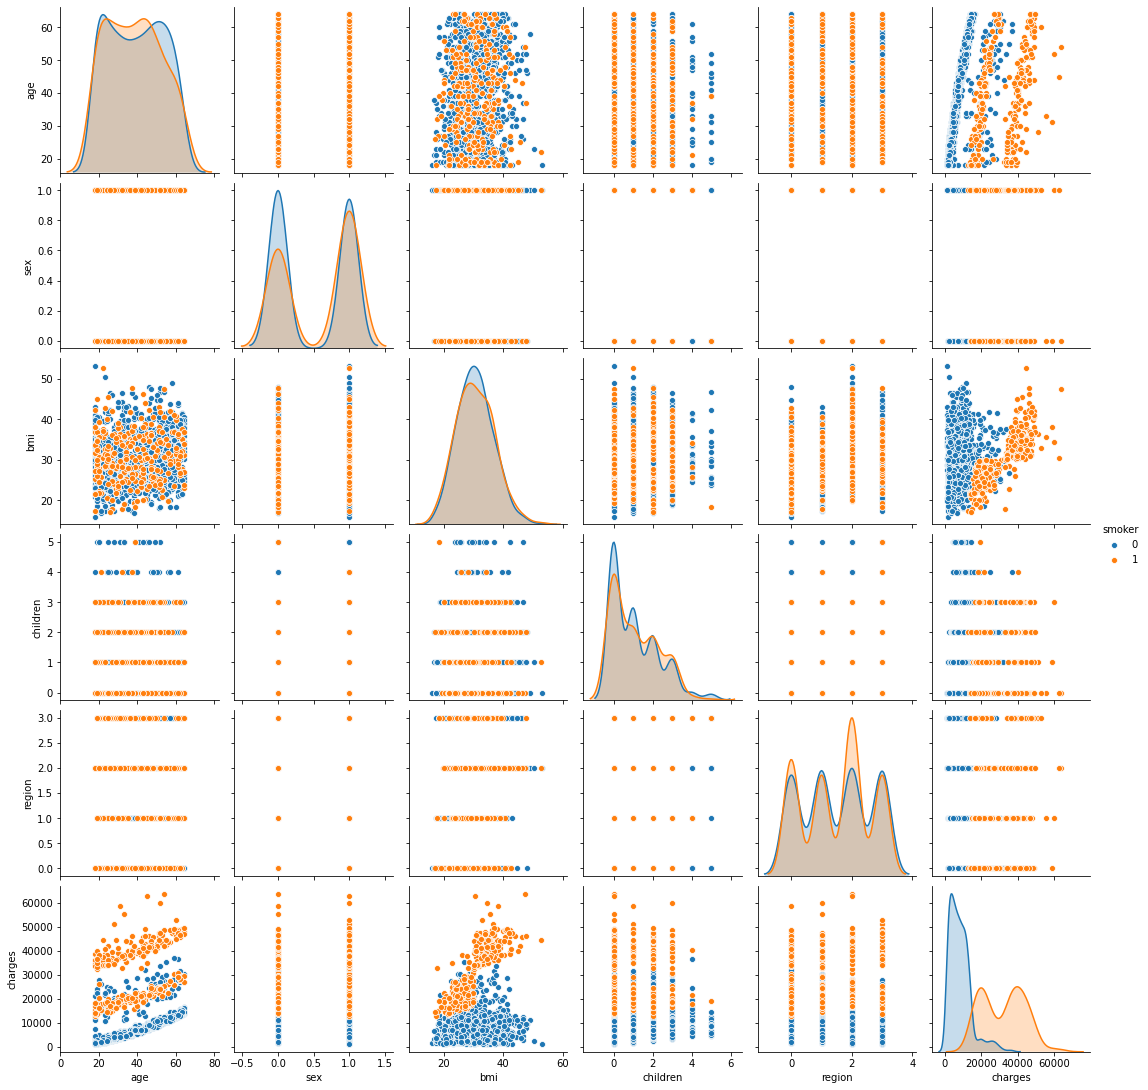

In [39]:
sns.pairplot(df1,hue='smoker')

#Hypothesis Testing
#H0-Smoker and Non smoker incurred are same charges
#H1-Smoker and Non smoker incurred are not smae charges.

In [ ]:
#T Test

In [41]:
from scipy.stats import  ttest_ind
import scipy.stats as stats 
import numpy as np

In [42]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

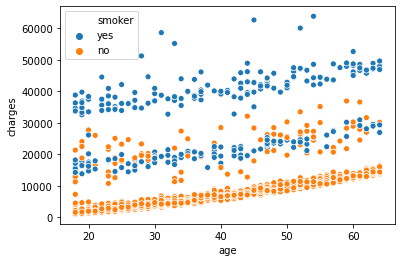

In [43]:
sns.scatterplot(df['age'],df['charges'],hue=df['smoker'])

In [44]:
x = np.array(df[df.smoker == 'yes'].charges) 
y = np.array(df[df.smoker == 'no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0) 
print('P_Value:', p_value)

P_Value: 8.271435842177219e-283


In [45]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Charges of smoker and non-smoker are not same')
else:
    print('Fail to Reject Null Hypothesis.Charges of smoker and non-smoker are  same')

Rejecting Null Hypothesis.Charges of smoker and non-smoker are not same


In [46]:
#Does bmi of males differ significantly from that of females?

In [48]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


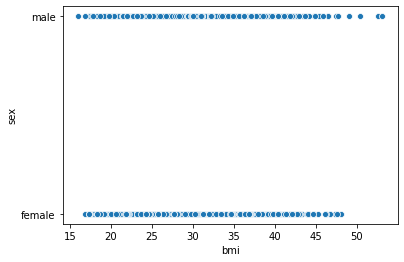

In [49]:
sns.scatterplot(df['bmi'],df['sex'])

In [50]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

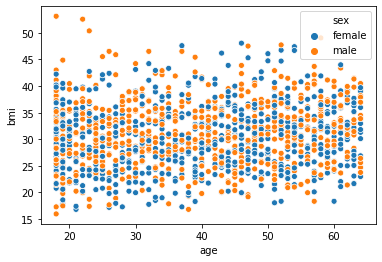

In [51]:
sns.scatterplot(df['age'],df['bmi'],hue=df['sex'])

In [52]:
bmi_male=np.array(df[df.sex == 'male'].bmi)
bmi_female=np.array(df[df.sex == 'female'].bmi)
t, p_value  = stats.ttest_ind(bmi_male,bmi_female, axis = 0) 
print('P_Value:', p_value)

P_Value: 0.08997637178984932


In [53]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Gender has effect on bmi')
else:
    print('Fail to Reject Null Hypothesis.Gender does not have any effect on bmi')

Fail to Reject Null Hypothesis.Gender does not have any effect on bmi


In [ ]:
#Is the proportion of smokers significantly different in different genders?

In [57]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

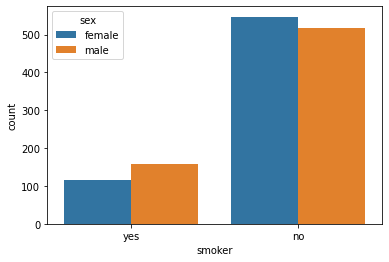

In [58]:
sns.countplot(df['smoker'],hue=df['sex'])

In [59]:
import pandas as pd
crosstab=pd.crosstab(df['sex'],df['smoker'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 0.006548143503580696


In [60]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Gender has efect on smokers')
else:
    print('Fail to Reject Null Hypothesis.Gender does not have effect on smokers')

Rejecting Null Hypothesis.Gender has efect on smokers


In [ ]:
#Is the distribution of bmi across women with no children, one child and two children, the same?

In [62]:
df_female=df[df['sex']=='female']
df_female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [63]:
df_female=df_female.reset_index()

In [64]:
zero_children=df_female[df_female['children']==0]['bmi']
one_children=df_female[df_female['children']==1]['bmi']
two_children=df_female[df_female['children']==2]['bmi']

In [65]:
f_stats,p_value=stats.f_oneway(zero_children,one_children,two_children)
print('F_stats:',f_stats)
print('p_value:',p_value)

F_stats: 0.3344720147757968
p_value: 0.7158579926754841


In [ ]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.No of childrens for women affect the bmi')
else:
    print('Fail to Reject Null Hypothesis.No of childrens for women does not affect the bmi')